## Importing libraries

In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score


## Loading data

In [4]:
df = pd.read_csv('../data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv')
display(df)
df.shape

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


(7043, 21)

## Exploratory Data Analysis (EDA)

In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [7]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
df = df.drop('customerID', axis = 1)
df.shape

(7043, 20)

In [9]:
df['gender'].value_counts()

gender
Male      3555
Female    3488
Name: count, dtype: int64

In [10]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [11]:
df_churn = df[df['Churn'] == 'Yes']
df_nochurn = df[df['Churn'] == 'No']

In [12]:
df_churn['gender'].value_counts(normalize= True)

gender
Female    0.502408
Male      0.497592
Name: proportion, dtype: float64

In [13]:
df_nochurn['gender'].value_counts(normalize= True)

gender
Male      0.507344
Female    0.492656
Name: proportion, dtype: float64

In [14]:
df_nochurn['SeniorCitizen'].value_counts(normalize= True)

SeniorCitizen
0    0.871279
1    0.128721
Name: proportion, dtype: float64

In [15]:
df_churn['SeniorCitizen'].value_counts(normalize= True)

SeniorCitizen
0    0.745318
1    0.254682
Name: proportion, dtype: float64

In [16]:
df[df['SeniorCitizen']==1]['Churn'].value_counts(normalize= True)

Churn
No     0.583187
Yes    0.416813
Name: proportion, dtype: float64

In [17]:
df[df['SeniorCitizen']==0]['Churn'].value_counts(normalize= True)

Churn
No     0.763938
Yes    0.236062
Name: proportion, dtype: float64

In [18]:
df['SeniorCitizen'].value_counts(normalize= True)

SeniorCitizen
0    0.837853
1    0.162147
Name: proportion, dtype: float64

In [69]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].sort_values(ascending = True).head()
df['TotalCharges'].isna().sum()
df.dropna(subset=['TotalCharges'], inplace = True)

df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


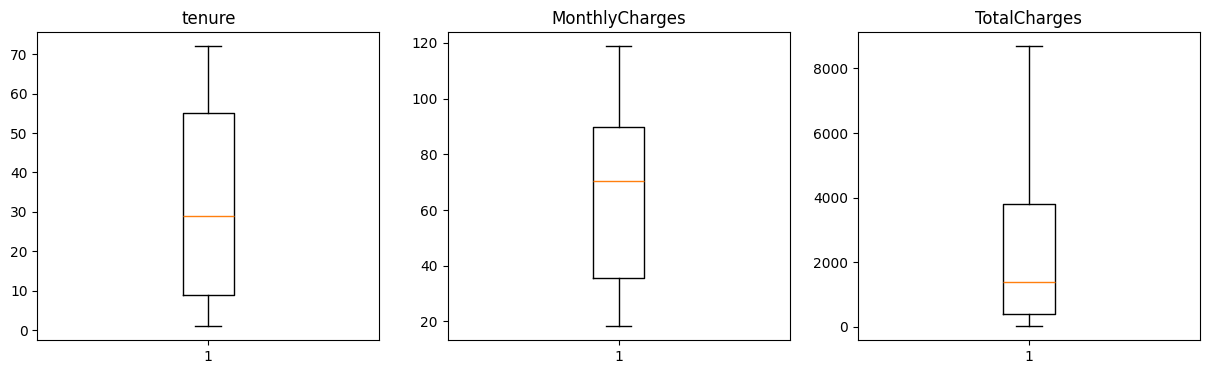

In [82]:
#checking for outliers

numerical_features = ['tenure', 'MonthlyCharges','TotalCharges']

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for i,ax in zip(numerical_features, axes):
    ax.boxplot(x = df[i])
    ax.set_title(i)
    
plt.show()

#does not seem to be any outlier

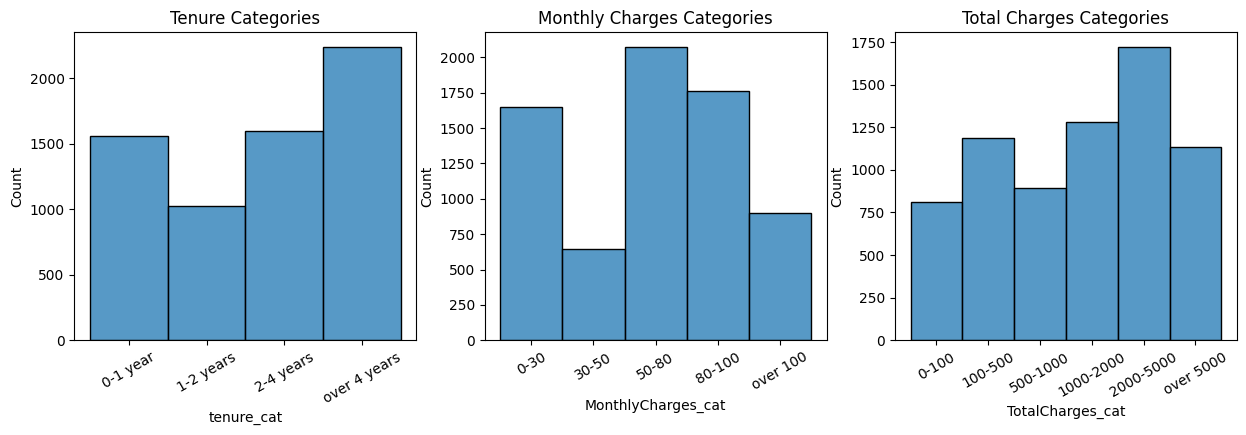

In [90]:
#categorize numerical features into different groups 

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

bins = [df['tenure'].min(),12,24,48,df['tenure'].max()]
labels = ['0-1 year','1-2 years','2-4 years','over 4 years']
df['tenure_cat'] = pd.cut(df['tenure'],bins=bins,labels=labels)
sns.histplot(df['tenure_cat'], ax=axes[0])
axes[0].set_title('Tenure Categories')
axes[0].tick_params(axis='x', rotation=30)

bins = [df['MonthlyCharges'].min(),30,50,80,100,df['MonthlyCharges'].max()]
labels = ['0-30','30-50','50-80','80-100','over 100']
df['MonthlyCharges_cat'] = pd.cut(df['MonthlyCharges'],bins=bins,labels=labels)
plt.xticks(rotation=30)
sns.histplot(df['MonthlyCharges_cat'], ax=axes[1])
axes[1].set_title('Monthly Charges Categories')
axes[1].tick_params(axis='x', rotation=30)

bins = [df['TotalCharges'].min(),100,500,1000,2000,5000,df['TotalCharges'].max()]
labels = ['0-100','100-500','500-1000','1000-2000','2000-5000','over 5000']
df['TotalCharges_cat'] = pd.cut(df['TotalCharges'],bins=bins,labels=labels)
plt.xticks(rotation=30)
sns.histplot(df['TotalCharges_cat'], ax=axes[2])
axes[2].set_title('Total Charges Categories')
axes[2].tick_params(axis='x', rotation=30)

/var/folders/84/2vk315td0qq3r5sg29wp35000000gn/T/ipykernel_13037/3469546206.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby(['Churn', col]).size().reset_index(name='Count')
/var/folders/84/2vk315td0qq3r5sg29wp35000000gn/T/ipykernel_13037/3469546206.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby(['Churn', col]).size().reset_index(name='Count')
/var/folders/84/2vk315td0qq3r5sg29wp35000000gn/T/ipykernel_13037/3469546206.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass ob

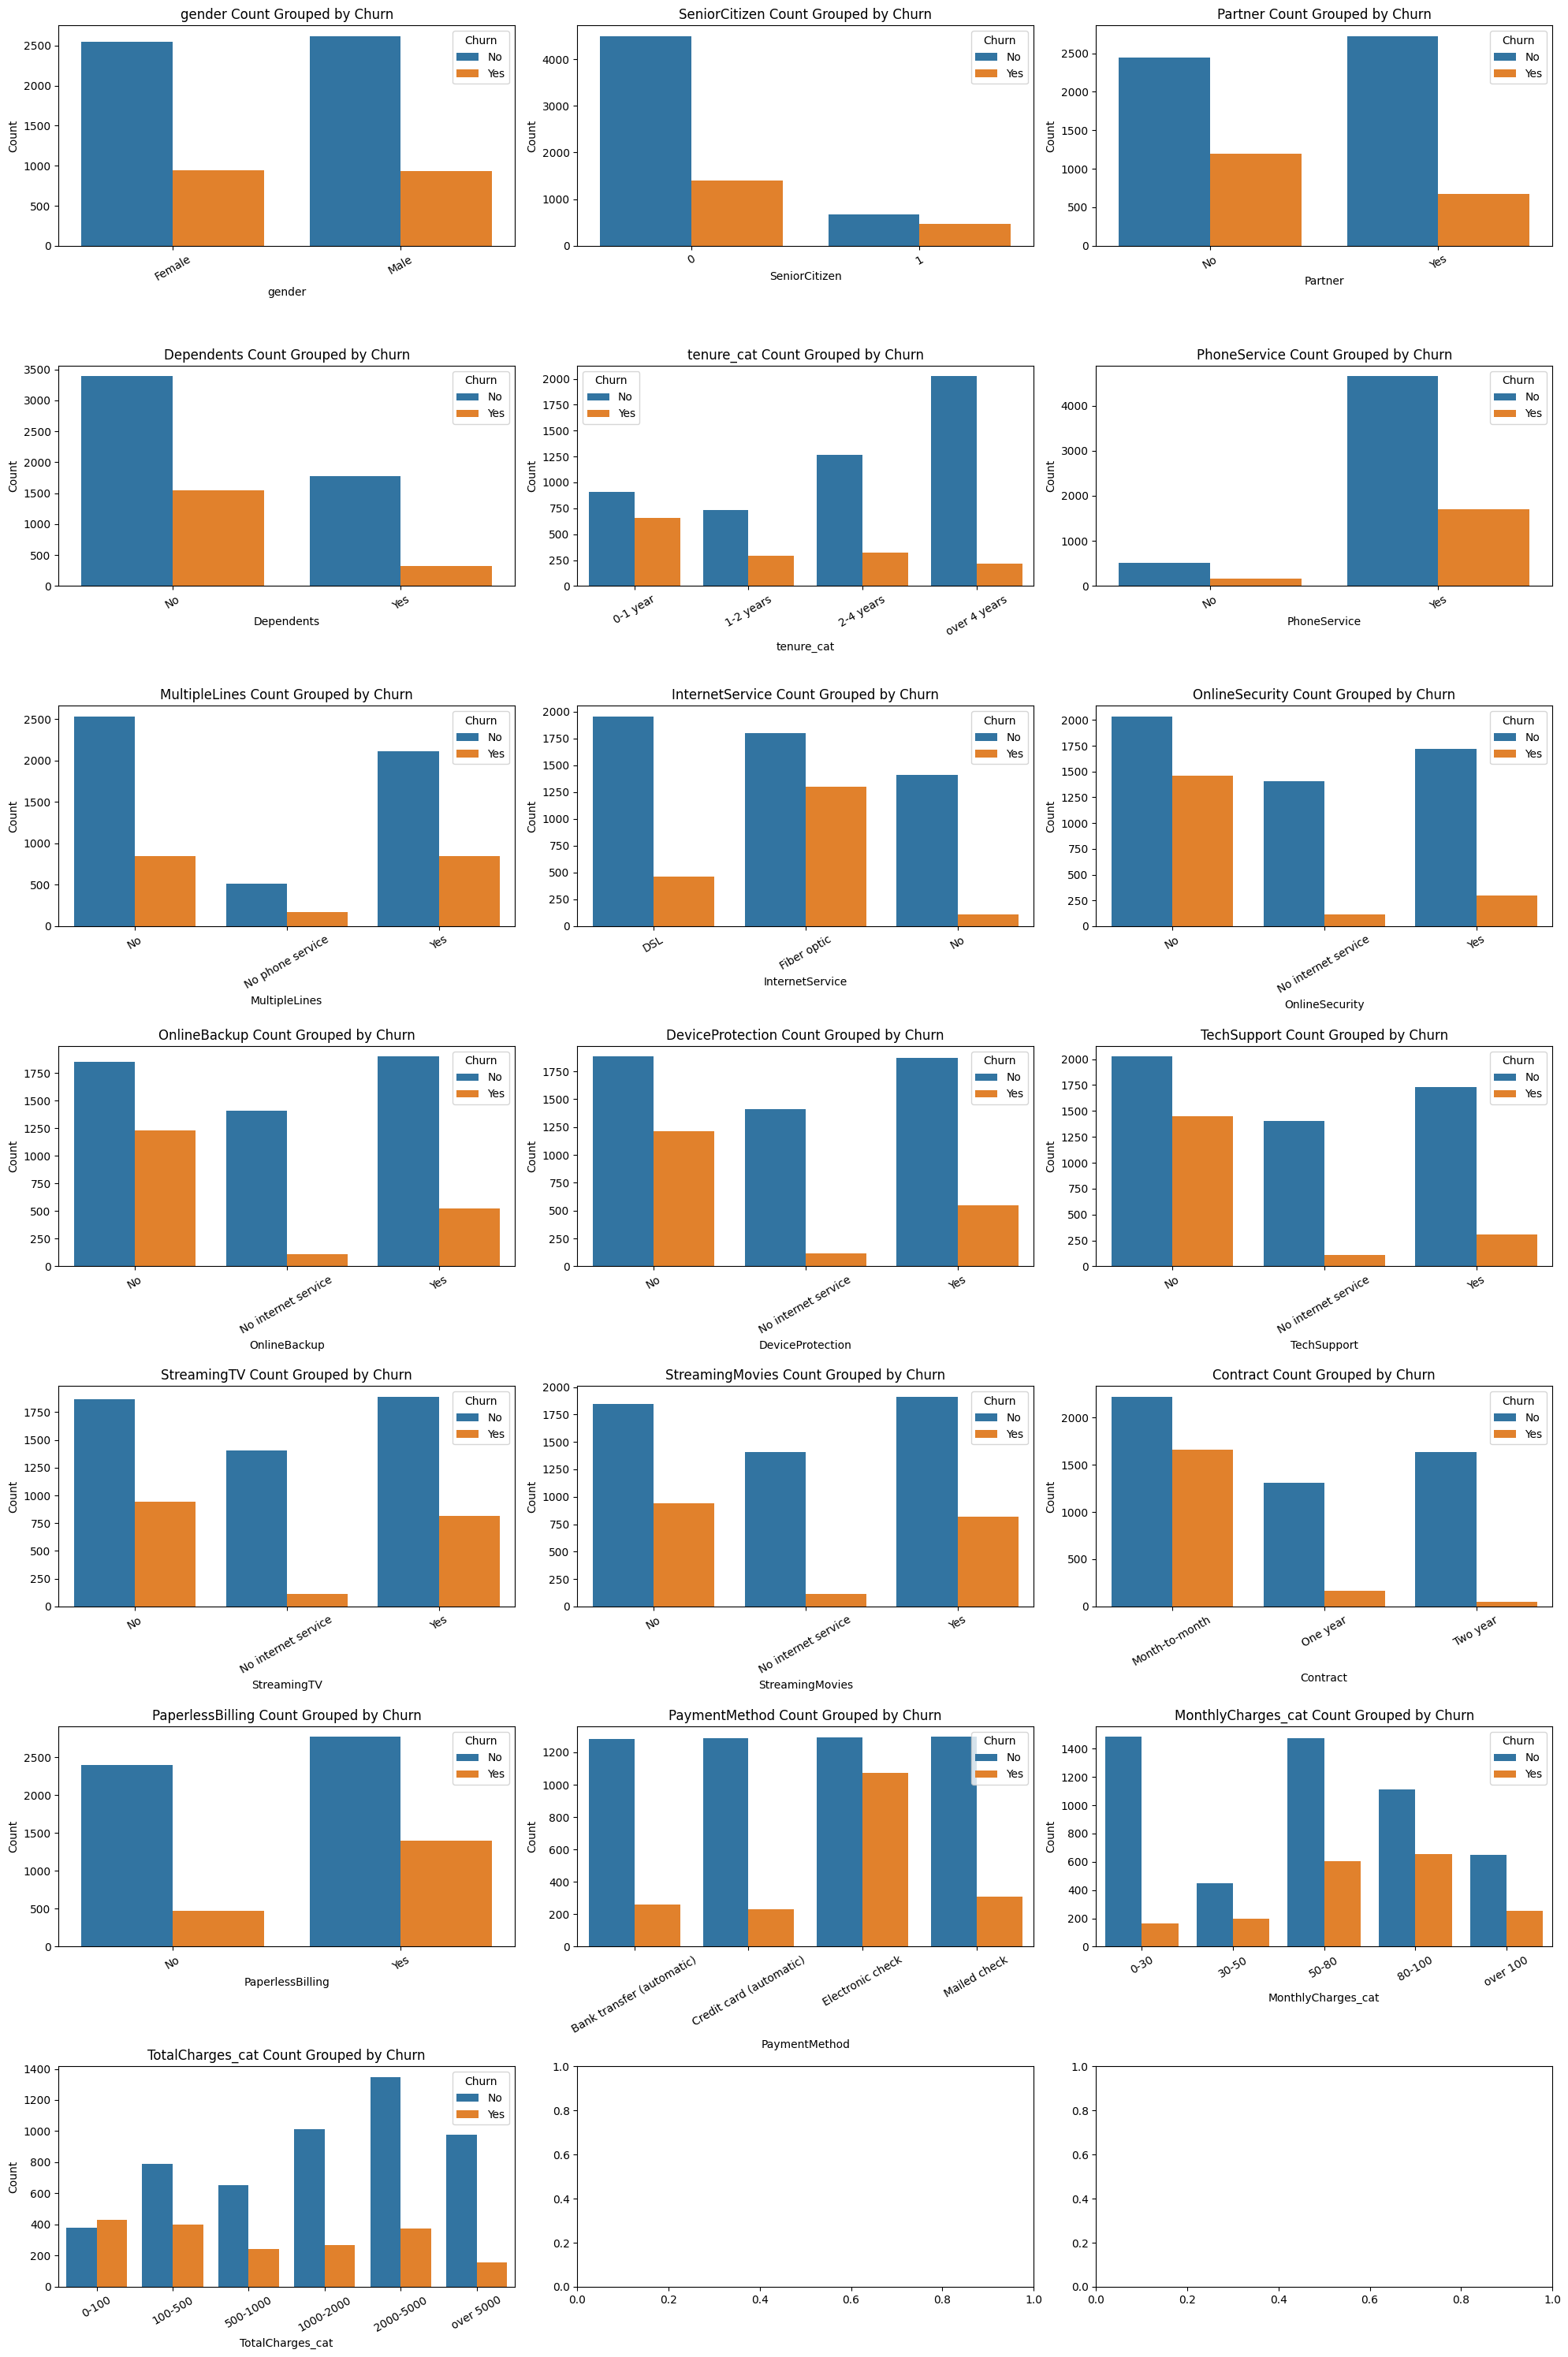

In [101]:
df.groupby('Churn')['PhoneService'].value_counts(normalize=True)

categorical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents','tenure_cat',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod','MonthlyCharges_cat','TotalCharges_cat']

fig, axes = plt.subplots(7, 3, figsize=(20, 30))  
axes = axes.flatten()

for col,ax in zip(categorical_features, axes):
    grouped_data = df.groupby(['Churn', col]).size().reset_index(name='Count')
    sns.barplot(x=col, y='Count', hue='Churn', data=grouped_data, ax=ax)
    ax.set_title(f'{col} Count Grouped by Churn')
    ax.tick_params(axis='x', rotation=30)    

plt.tight_layout()
plt.show()


### First interpretations:
Clients are more likely to churn if:
- They have no dependent and no partner
- They are a senior citizen (older than 65y)
- They are recent customers (less than 1 year)
- They have multiple lines (-> maybe because they will save more if they switch to a cheaper provider? could present specific offers for multiple lines)
- They have fiber optic Internet service
- They subscribe to Internet but do not subscribe to Online security, Online backup, Device protection, or Tech support services
- Their contract is month-to-month
- They pay via electronic check

## K-Means

#### Transforming categorical features in numerical

In [132]:
df_categorical_features_for_dummification = df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'PaperlessBilling',
                                               'MultipleLines', 'InternetService', 'OnlineSecurity','OnlineBackup', 'DeviceProtection',
                                               'TechSupport', 'StreamingTV','StreamingMovies', 'Contract', 'PaymentMethod','Churn']]


df_dummified = pd.get_dummies(df_categorical_features_for_dummification)

df_numerical_features = df[['tenure', 'MonthlyCharges','TotalCharges']]

df_dummified = pd.concat([df_dummified,df_numerical_features],axis=1)
df_dummified


,SeniorCitizen,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,PaperlessBilling_No,...,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes,tenure,MonthlyCharges,TotalCharges
0,0,True,False,False,True,True,False,True,False,False,...,False,False,False,True,False,True,False,1,29.85,29.85
1,0,False,True,True,False,True,False,False,True,True,...,False,False,False,False,True,True,False,34,56.95,1889.50
2,0,False,True,True,False,True,False,False,True,False,...,False,False,False,False,True,False,True,2,53.85,108.15
3,0,False,True,True,False,True,False,True,False,True,...,False,True,False,False,False,True,False,45,42.30,1840.75
4,0,True,False,True,False,True,False,False,True,False,...,False,False,False,True,False,False,True,2,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,False,True,False,True,False,True,False,True,False,...,False,False,False,False,True,True,False,24,84.80,1990.50
7039,0,True,False,False,True,False,True,False,True,False,...,False,False,True,False,False,True,False,72,103.20,7362.90
7040,0,True,False,False,True,False,True,True,False,False,...,False,False,False,True,False,True,False,11,29.60,346.45
7041,1,False,True,False,True,True,False,False,True,False,...,False,False,False,False,True,False,True,4,74.40,306.60


### Elbow Method without standardization

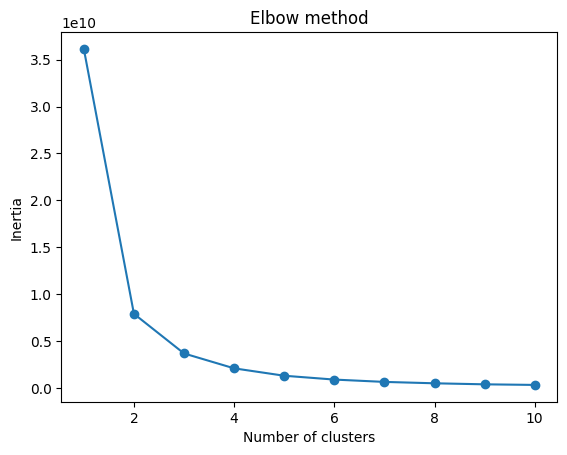

In [133]:
try:
    inertias = []

    for i in range(1,11):
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(df_dummified)
        inertias.append(kmeans.inertia_)

    plt.plot(range(1,11), inertias, marker='o')
    plt.title('Elbow method')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.show()

except Exception as e:
    print('An error occurred:', str(e))

#The elbow method shows that 2 is a good value for K, so we retrain and visualize the result.


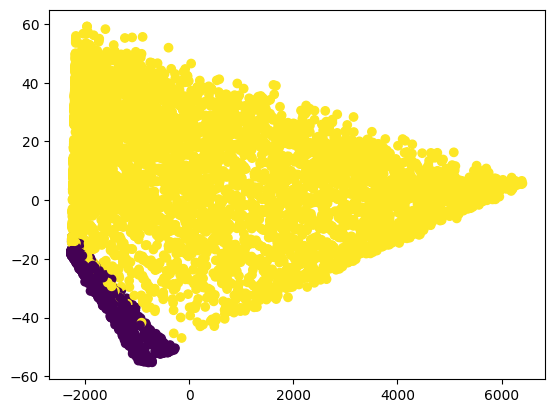

In [188]:
try:
    kmeans = KMeans(n_clusters=2)
    kmeans.fit(df_dummified_stand)
    
    pca_norm = PCA(n_components=2)
    df_dummified_pca = pca.fit_transform(df_dummified)
    
    plt.scatter(x=df_dummified_pca[:, 0], y=df_dummified_pca[:, 1], c=kmeans.labels_)
    plt.show()

except Exception as e:
    print('An error occurred:', str(e))
    

### Elbow Method with Standardization

In [173]:
#trying with standardization of numerical data

standardizer = StandardScaler()
standardizer.fit(df_dummified)

np_dummified_stand = standardizer.transform(df_dummified)
df_dummified_stand = pd.DataFrame(np_dummified_stand, columns = df_dummified.columns,index=df_dummified.index)
df_dummified_stand

,SeniorCitizen,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,PaperlessBilling_No,...,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes,tenure,MonthlyCharges,TotalCharges
0,-0.440327,1.009430,-1.009430,-1.035617,1.035617,0.652305,-0.652305,3.056334,-3.056334,-0.828939,...,-0.561364,-0.529976,-0.525351,1.404764,-0.543604,0.601663,-0.601663,-1.280248,-1.161694,-0.994194
1,-0.440327,-0.990658,0.990658,0.965608,-0.965608,0.652305,-0.652305,-0.327189,0.327189,1.206361,...,-0.561364,-0.529976,-0.525351,-0.711863,1.839576,0.601663,-0.601663,0.064303,-0.260878,-0.173740
2,-0.440327,-0.990658,0.990658,0.965608,-0.965608,0.652305,-0.652305,-0.327189,0.327189,-0.828939,...,-0.561364,-0.529976,-0.525351,-0.711863,1.839576,-1.662059,1.662059,-1.239504,-0.363923,-0.959649
3,-0.440327,-0.990658,0.990658,0.965608,-0.965608,0.652305,-0.652305,3.056334,-3.056334,1.206361,...,-0.561364,1.886879,-0.525351,-0.711863,-0.543604,0.601663,-0.601663,0.512486,-0.747850,-0.195248
4,-0.440327,1.009430,-1.009430,0.965608,-0.965608,0.652305,-0.652305,-0.327189,0.327189,-0.828939,...,-0.561364,-0.529976,-0.525351,1.404764,-0.543604,-1.662059,1.662059,-1.239504,0.196178,-0.940457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,-0.440327,-0.990658,0.990658,-1.035617,1.035617,-1.533025,1.533025,-0.327189,0.327189,-0.828939,...,-0.561364,-0.529976,-0.525351,-0.711863,1.839576,0.601663,-0.601663,-0.343137,0.664868,-0.129180
7039,-0.440327,1.009430,-1.009430,-1.035617,1.035617,-1.533025,1.533025,-0.327189,0.327189,-0.828939,...,-0.561364,-0.529976,1.903490,-0.711863,-0.543604,0.601663,-0.601663,1.612573,1.276493,2.241056
7040,-0.440327,1.009430,-1.009430,-1.035617,1.035617,-1.533025,1.533025,3.056334,-3.056334,-0.828939,...,-0.561364,-0.529976,-0.525351,1.404764,-0.543604,0.601663,-0.601663,-0.872808,-1.170004,-0.854514
7041,2.271039,-0.990658,0.990658,-1.035617,1.035617,0.652305,-0.652305,-0.327189,0.327189,-0.828939,...,-0.561364,-0.529976,-0.525351,-0.711863,1.839576,-1.662059,1.662059,-1.158016,0.319168,-0.872095


#### Testing relevancy of PCA method 

In [197]:

# Fit KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_dummified_stand)

 # Apply PCA
pca = PCA()
pca.fit(df_dummified_stand)  # Fit PCA to compute explained variance
explained_variance = pca.explained_variance_ratio_

# Check if the sum of the first two elements is less than 80%
if sum(explained_variance[:2]) < 0.80:
    print(f"PCA may not be optimal as the first two components explain only {sum(explained_variance[:2]): .2} of the variance, which is less than 80%.")
    print(" ")

print("Explained variance ratio:", pca.explained_variance_ratio_)


PCA may not be optimal as the first two components explain only  0.38 of the variance, which is less than 80%.
 
Explained variance ratio: [2.44948937e-01 1.36350969e-01 9.25408866e-02 5.44134750e-02
 5.00926788e-02 4.26098823e-02 3.58545853e-02 3.33892176e-02
 2.95503691e-02 2.85276131e-02 2.72601193e-02 2.60134092e-02
 2.55830812e-02 2.46037605e-02 2.39741180e-02 2.27106856e-02
 2.09745207e-02 1.96620556e-02 1.83626883e-02 1.73901451e-02
 1.62514746e-02 7.67121915e-03 1.24367871e-03 2.04303003e-05
 5.39880997e-17 3.86034770e-17 3.58487870e-17 2.92814434e-17
 2.87280545e-17 2.27470521e-17 1.92627853e-17 1.73629833e-17
 1.50575690e-17 1.15465051e-17 7.56029117e-18 4.57047850e-18
 3.37515101e-18 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00]


#### Testing relevancy of Isomap method 

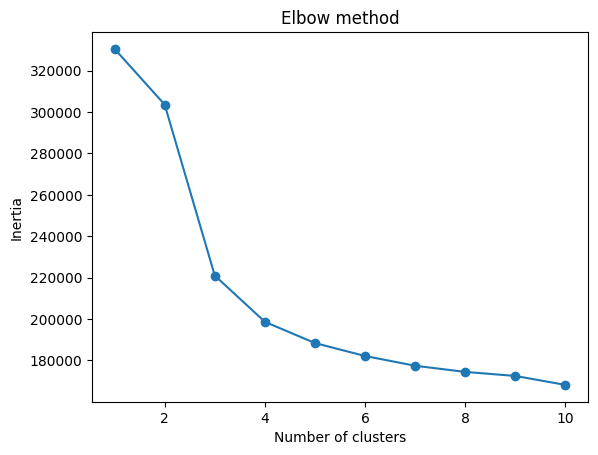

In [194]:
try:
    inertias = []

    for i in range(1,11):
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(df_dummified_stand)
        inertias.append(kmeans.inertia_)

    plt.plot(range(1,11), inertias, marker='o')
    plt.title('Elbow method')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.show()

except Exception as e:
    print('An error occurred:', str(e))

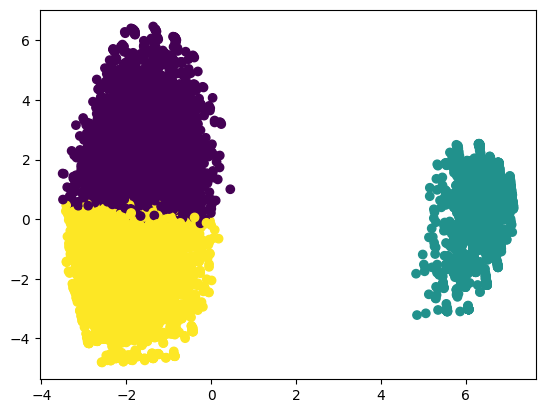

In [176]:
try:
    kmeans = KMeans(n_clusters=3)
    kmeans.fit(df_dummified_stand)
    
    pca_norm = PCA(n_components=2)
    df_dummified_stand_pca = pca.fit_transform(df_dummified_stand)
    
    plt.scatter(x=df_dummified_stand_pca[:, 0], y=df_dummified_stand_pca[:, 1], c=kmeans.labels_)
    plt.show()

except Exception as e:
    print('An error occurred:', str(e))

In [177]:
#clusterer = KMeans(n_clusters=n_clusters, random_state=10)
#cluster_labels = clusterer.fit_predict(X)

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    silhouette_avg = silhouette_score(df_dummified_stand, kmeans.labels_)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)
    

For n_clusters = 2 The average silhouette_score is : 0.20592665096638635
For n_clusters = 3 The average silhouette_score is : 0.20592665096638635
For n_clusters = 4 The average silhouette_score is : 0.20592665096638635
For n_clusters = 5 The average silhouette_score is : 0.20592665096638635
For n_clusters = 6 The average silhouette_score is : 0.20592665096638635
